# Employee TurnOver prediction using Neural Network

# Importing the Data set

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Downloads/HR_comma_sep.csv")

In [2]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Data Pre-processing

converting the categorical columns to numbers, by converting them to dummy variables. Dummy variables are usually ones and zeros that indicate the presence or absence of a categorical feature. In this kind of situation avoiding the dummy variable trap by dropping the first dummy.

In [4]:
feats = ['sales','salary']
df_final = pd.get_dummies(df,columns=feats,drop_first=True)

# Separating Your Training and Testing Datasets

use scikit-learn to split your dataset into a training and a testing set. This is necessary so you can use part of the employee data to train the model and a part of it to test its performance.
I will use 70% of the data for training and 30% for testing.

In [5]:
from sklearn.model_selection import train_test_split
X = df_final.drop(['left'],axis=1).values
y = df_final['left'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Transforming the Data

When building Deep Learning models it is usually good practice to scale the dataset in order to make the computations more efficient. In this step, scale the data using the StandardScaler; this will ensure that the dataset values have a mean of zero and a unit variable.

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the Artificial Neural Network

use keras to build the deep learning model.

When building a Deep Learning model you usually specify three layer types:

* The input layer is the layer to which pass the features of the dataset. There is no computation that occurs in this layer. It serves to pass features to the hidden layers.
* The hidden layers are usually the layers between the input layer and the output layer and there can be more than one. These layers perform the computations and pass the information to the output layer.
* The output layer represents the layer of your neural network that will give the results after training the model. It is responsible for producing the output variables.

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

A classification problem is a task where you have labeled data and would like to make some predictions based on the labeled data. Add this code to your notebook to create a classifier variable:

In [10]:
classifier = Sequential()
classifier.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))


In [11]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [13]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1050/1050 [==============================] - 1s 757us/step - loss: 0.2344 - accuracy: 0.9244
Epoch 2/100
1050/1050 [==============================] - 1s 764us/step - loss: 0.1853 - accuracy: 0.9450
Epoch 3/100
1050/1050 [==============================] - 1s 757us/step - loss: 0.1701 - accuracy: 0.9509
Epoch 4/100
1050/1050 [==============================] - 1s 791us/step - loss: 0.1643 - accuracy: 0.9518
Epoch 5/100
1050/1050 [==============================] - 1s 972us/step - loss: 0.1618 - accuracy: 0.9526
Epoch 6/100
1050/1050 [==============================] - 1s 979us/step - loss: 0.1598 - accuracy: 0.9530
Epoch 7/100
1050/1050 [==============================] - 1s 847us/step - loss: 0.1583 - accuracy: 0.9545
Epoch 8/100
1050/1050 [==============================] - 1s 882us/step - loss: 0.1570 - accuracy: 0.9546
Epoch 9/100
1050/1050 [==============================] - 1s 863us/step - loss: 0.1556 - accuracy: 0.9553
Epoch 10/100
1050/1050 [==============================]

In [18]:
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
1050/1050 [==============================] - 1s 769us/step - loss: 0.1327 - accuracy: 0.9605
Epoch 2/100
1050/1050 [==============================] - 1s 1ms/step - loss: 0.1326 - accuracy: 0.9613
Epoch 3/100
1050/1050 [==============================] - 1s 812us/step - loss: 0.1327 - accuracy: 0.9609
Epoch 4/100
1050/1050 [==============================] - 1s 768us/step - loss: 0.1320 - accuracy: 0.9605
Epoch 5/100
1050/1050 [==============================] - 1s 747us/step - loss: 0.1317 - accuracy: 0.9611
Epoch 6/100
1050/1050 [==============================] - 1s 804us/step - loss: 0.1318 - accuracy: 0.9603
Epoch 7/100
1050/1050 [==============================] - 1s 753us/step - loss: 0.1317 - accuracy: 0.9617
Epoch 8/100
1050/1050 [==============================] - 1s 782us/step - loss: 0.1318 - accuracy: 0.9608
Epoch 9/100
1050/1050 [==============================] - 1s 767us/step - loss: 0.1318 - accuracy: 0.9609
Epoch 10/100
1050/1050 [==============================] -

In [28]:
history = classifier.fit(X_train, y_train, validation_split=0.30 ,batch_size = 10, epochs = 100)

Epoch 1/100
735/735 [==============================] - 2s 2ms/step - loss: 0.1204 - accuracy: 0.9648 - val_loss: 0.1336 - val_accuracy: 0.9587
Epoch 2/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1193 - accuracy: 0.9642 - val_loss: 0.1360 - val_accuracy: 0.9594
Epoch 3/100
735/735 [==============================] - 1s 2ms/step - loss: 0.1189 - accuracy: 0.9633 - val_loss: 0.1366 - val_accuracy: 0.9578
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1190 - accuracy: 0.9643 - val_loss: 0.1372 - val_accuracy: 0.9565
Epoch 5/100
735/735 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.9635 - val_loss: 0.1381 - val_accuracy: 0.9578
Epoch 6/100
735/735 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9638 - val_loss: 0.1384 - val_accuracy: 0.9584
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.1395 - val_accuracy: 0.9578

In [29]:
history = classifier.evaluate(X_test,y_test)

141/141 [==============================] - 0s 814us/step - loss: 0.1431 - accuracy: 0.9564


In [43]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [45]:
scores = classifier.evaluate(X_test, y_test)

141/141 [==============================] - 0s 732us/step - loss: 0.1431 - accuracy: 0.9564


In [49]:
model = Sequential()
model.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split=0.30 ,batch_size = 10, epochs = 100)

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5819 - accuracy: 0.7547 - val_loss: 0.3443 - val_accuracy: 0.8190
Epoch 2/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3181 - accuracy: 0.8316 - val_loss: 0.2741 - val_accuracy: 0.8543
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2612 - accuracy: 0.8525 - val_loss: 0.2384 - val_accuracy: 0.8629
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2263 - accuracy: 0.8857 - val_loss: 0.2193 - val_accuracy: 0.9400
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2116 - accuracy: 0.9462 - val_loss: 0.2054 - val_accuracy: 0.9473
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1960 - accuracy: 0.9540 - val_loss: 0.1973 - val_accuracy: 0.9521
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1916 - accuracy: 0.9530 - val_loss: 0.1905 - val_accuracy: 0.9508

In [51]:
scores = model.evaluate(X_test, y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.1566 - accuracy: 0.9531


In [52]:
print("Accuracy of the Model is: %.2f%% " % (scores[1]*100))

Accuracy of the Model is: 95.31% 


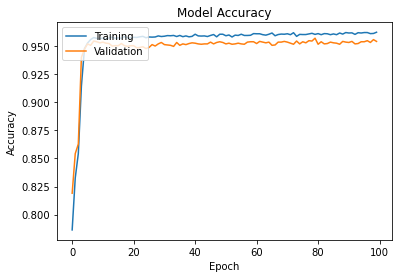

In [53]:
import sys
import pandas as pd # data processing, CSV file I/O
import numpy as np # linear algebra
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

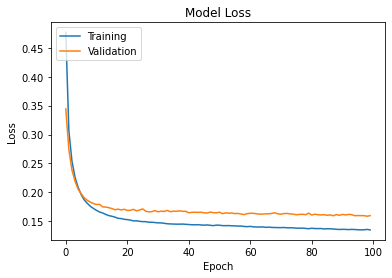

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [55]:
model = Sequential()
model.add(Dense(9, kernel_initializer = "uniform",activation = "relu", input_dim=18))
model.add(Dense(5, kernel_initializer = "uniform",activation = "relu"))
model.add(Dense(3, kernel_initializer = "uniform",activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train, y_train, validation_split=0.30 ,batch_size = 10, epochs = 100)

Epoch 1/100
735/735 [==============================] - 2s 2ms/step - loss: 0.5894 - accuracy: 0.7566 - val_loss: 0.3359 - val_accuracy: 0.8190
Epoch 2/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2993 - accuracy: 0.8605 - val_loss: 0.2248 - val_accuracy: 0.9283
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2046 - accuracy: 0.9382 - val_loss: 0.1853 - val_accuracy: 0.9454
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1618 - accuracy: 0.9506 - val_loss: 0.1700 - val_accuracy: 0.9492
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1496 - accuracy: 0.9563 - val_loss: 0.1641 - val_accuracy: 0.9508
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1403 - accuracy: 0.9596 - val_loss: 0.1588 - val_accuracy: 0.9568
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.1383 - accuracy: 0.9575 - val_loss: 0.1573 - val_accuracy: 0.9552

In [56]:
scores = model.evaluate(X_test, y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9591


In [57]:
print("Accuracy of the Model is: %.2f%% " % (scores[1]*100))

Accuracy of the Model is: 95.91% 


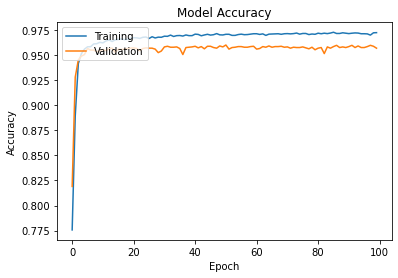

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

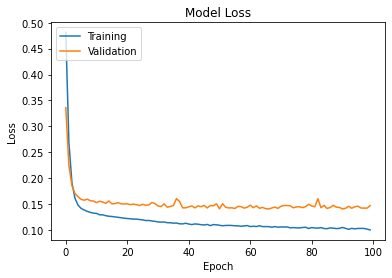

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Grid Search Regularization Hyperparameter
Once you can confirm that weight regularization may improve your overfit model, you can test different values of the regularization parameter.

It is a good practice to first grid search through some orders of magnitude between 0.0 and 0.1, then once a level is found, to grid search on that level.

We can grid search through the orders of magnitude by defining the values to test, looping through each and recording the train and test performance.

In [60]:
# grid search values
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
    # define model
    model = Sequential()
    model.add(Dense(9, kernel_regularizer=l2(param),activation = "relu", input_dim=18))
    model.add(Dense(5, kernel_regularizer=l2(param),activation = "relu"))
    model.add(Dense(3, kernel_regularizer=l2(param),activation = "relu", input_dim=18))
    model.add(Dense(1, kernel_regularizer=l2(param),activation = "sigmoid"))
    model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

   
    # fit model
    model.fit(X_train, y_train, validation_split=0.30 ,batch_size = 10, epochs = 100) 
    # evaluate the model
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

Epoch 1/100
735/735 [==============================] - 1s 1ms/step - loss: 0.5805 - accuracy: 0.7542 - val_loss: 0.3767 - val_accuracy: 0.7632
Epoch 2/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.7825 - val_loss: 0.3210 - val_accuracy: 0.8673
Epoch 3/100
735/735 [==============================] - 1s 1ms/step - loss: 0.3103 - accuracy: 0.8764 - val_loss: 0.2861 - val_accuracy: 0.8968
Epoch 4/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2768 - accuracy: 0.9083 - val_loss: 0.2679 - val_accuracy: 0.9146
Epoch 5/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2625 - accuracy: 0.9185 - val_loss: 0.2527 - val_accuracy: 0.9194
Epoch 6/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2425 - accuracy: 0.9275 - val_loss: 0.2423 - val_accuracy: 0.9222
Epoch 7/100
735/735 [==============================] - 1s 1ms/step - loss: 0.2218 - accuracy: 0.9384 - val_loss: 0.2366 - val_accuracy: 0.9241

KeyboardInterrupt: 

# Checking the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3351,   83],
       [ 115,  951]], dtype=int64)

https://www.digitalocean.com/community/tutorials/how-to-build-a-deep-learning-model-to-predict-employee-retention-using-keras-and-tensorflow